<a href="https://colab.research.google.com/github/amity1415/Insaid/blob/master/EDA_FB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)


In [4]:
# Install chart_studio, please use this command. 

!pip install chart-studio


     |████████████████████████████████| 81kB 5.3MB/s 


In [5]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [6]:
# Importing the FACEBOOK Dataset
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv')
df.head()

userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382  14   19       1999      11         male    266.0   0              
1  1192601  14   2        1999      11         female  6.0     0              
2  2083884  14   16       1999      11         male    13.0    0              
3  1203168  14   25       1999      12         female  93.0    0              
4  1733186  14   4        1999      12         male    82.0    0              

   friendships_initiated  likes  likes_received  mobile_likes  \
0  0                      0      0               0              
1  0                      0      0               0              
2  0                      0      0               0              
3  0                      0      0               0              
4  0                      0      0               0              

   mobile_likes_received  www_likes  www_likes_received  
0  0                      0          0                   
1  0                      0          0                   
2  0                      0          0                   
3  0                      0          0                   
4  0                      0          0

In [7]:
df.info()
# We found that the Gendre and tenure columns have NAN values. So lets work on those data to get it alligned with regular data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [8]:
df.describe()

userid           age       dob_day      dob_year     dob_month  \
count  9.900300e+04  99003.000000  99003.000000  99003.000000  99003.000000   
mean   1.597045e+06  37.280224     14.530408     1975.719776   6.283365       
std    3.440592e+05  22.589748     9.015606      22.589748     3.529672       
min    1.000008e+06  13.000000     1.000000      1900.000000   1.000000       
25%    1.298806e+06  20.000000     7.000000      1963.000000   3.000000       
50%    1.596148e+06  28.000000     14.000000     1985.000000   6.000000       
75%    1.895744e+06  50.000000     22.000000     1993.000000   9.000000       
max    2.193542e+06  113.000000    31.000000     2000.000000   12.000000      

             tenure  friend_count  friendships_initiated         likes  \
count  99001.000000  99003.000000  99003.000000           99003.000000   
mean   537.887375    196.350787    107.452471             156.078785     
std    457.649874    387.304229    188.786951             572.280681     
min    0.000000      0.000000      0.000000               0.000000       
25%    226.000000    31.000000     17.000000              1.000000       
50%    412.000000    82.000000     46.000000              11.000000      
75%    675.000000    206.000000    117.000000             81.000000      
max    3139.000000   4923.000000   4144.000000            25111.000000   

       likes_received  mobile_likes  mobile_likes_received     www_likes  \
count  99003.000000    99003.000000  99003.000000           99003.000000   
mean   142.689363      106.116300    84.120491              49.962425      
std    1387.919613     445.252985    839.889444             285.560152     
min    0.000000        0.000000      0.000000               0.000000       
25%    1.000000        0.000000      0.000000               0.000000       
50%    8.000000        4.000000      4.000000               0.000000       
75%    59.000000       46.000000     33.000000              7.000000       
max    261197.000000   25111.000000  138561.000000          14865.000000   

       www_likes_received  
count  99003.000000        
mean   58.568831           
std    601.416348          
min    0.000000            
25%    0.000000            
50%    2.000000            
75%    20.000000           
max    129953.000000

In [9]:
df[df['dob_day']==1]['dob_day'].count()/df[df['dob_day']==2]['dob_day'].count()

2.317395130536814

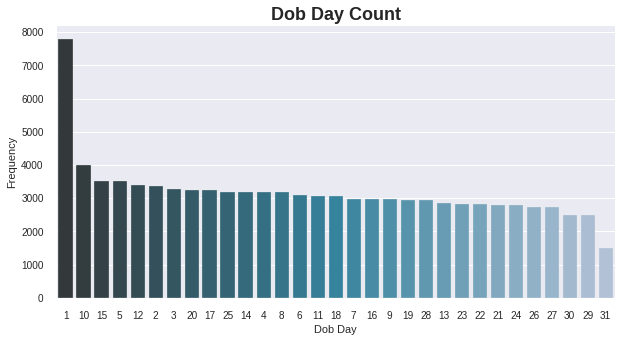

In [33]:
plt.figure(figsize=(10,5))
sns.countplot('dob_day',data = df, order = df['dob_day'].value_counts().index,palette="PuBuGn_d")
plt.title("Dob Day Count",fontsize=18,fontweight="bold")
plt.xlabel('Dob Day')
plt.ylabel('Frequency')
plt.show() # From the below graph we can conclude that users having day of birth on 1st of any month is around 230% more than the day of birth on any other day of the month.
#This is highly unlikely and can be assumed that the few users randomly enter the day of the birth as 1st. It can be considered that they are creating fake accounts.


In [10]:

df[df['gender'].isnull()].count() #175 entries are gender NAN: It can be considered Transgender.
# But it will not add any insight to our analysis. So since the ratio of 175/99903 is very low, we will allocae the NAN values to the mode.
#df['gender'].dropna().mode()

userid                   175
age                      175
dob_day                  175
dob_year                 175
dob_month                175
gender                   0  
tenure                   175
friend_count             175
friendships_initiated    175
likes                    175
likes_received           175
mobile_likes             175
mobile_likes_received    175
www_likes                175
www_likes_received       175
dtype: int64

In [11]:
df['gender']=df['gender'].fillna(df['gender'].dropna().mode()[0]) # Filling the missing gender values with the mode values

df[df['gender'].isnull()].count()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [12]:
df['tenure']=df['tenure'].fillna(df['tenure'].dropna().median()) # Filling the missing tenure values with the median values

df[df['tenure'].isnull()].count()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [13]:
df[df['tenure']== df['tenure'].max()]

userid  age  dob_day  dob_year  dob_month gender  tenure  \
86383  1419799  111  1        1902      2          male   3139.0   
96429  1601778  100  16       1913      1          male   3139.0   
97177  2135122  108  17       1905      6          male   3139.0   

       friend_count  friendships_initiated  likes  likes_received  \
86383  372           40                     11     21               
96429  1069          373                    137    63               
97177  1343          167                    18     14               

       mobile_likes  mobile_likes_received  www_likes  www_likes_received  
86383  2             13                     9          8                   
96429  45            35                     92         28                  
97177  0             12                     18         2

In [14]:

ind=df[df.where(df['tenure']>365).where(df['likes']==0).where(df['friendships_initiated']==0)['userid']>0].index  # To find the Rows where tenure>365, likes==0 && friendships_initiated==0
df.drop(ind,0,inplace=True)# delete the indexes
df[df.where(df['tenure']>365).where(df['likes']==0).where(df['friendships_initiated']==0)['userid']>0].count() # Print To Check if the unrequired rows are now deleted

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [15]:
df['combined_likes']= df['mobile_likes']+ df['www_likes']
df.groupby(['userid'])[['combined_likes', 'likes']].sum()

combined_likes  likes
userid                        
1000008  431             431  
1000013  128             128  
1000015  0               0    
1000038  0               0    
1000059  90              90   
1000061  0               0    
1000068  128             128  
1000094  277             277  
1000103  8               8    
1000125  0               0    
1000136  422             422  
1000150  99              99   
1000154  89              89   
1000157  9               9    
1000167  11              11   
1000172  72              72   
1000173  3               3    
1000183  0               0    
1000198  100             100  
1000288  0               0    
1000297  17              17   
1000301  289             289  
1000304  0               0    
1000315  35              35   
1000323  119             119  
1000341  51              51   
1000358  0               0    
1000382  665             665  
1000403  0               0    
1000406  0               0    
...     ..              ..    
2193145  1041            1041 
2193148  9               9    
2193156  64              64   
2193157  0               0    
2193175  0               0    
2193187  2               2    
2193190  1621            1621 
2193200  49              49   
2193209  23              23   
2193210  0               0    
2193222  2               2    
2193232  3               3    
2193243  93              93   
2193268  36              36   
2193273  1               1    
2193278  385             385  
2193371  6               6    
2193378  2               2    
2193387  0               0    
2193408  445             445  
2193411  1               1    
2193418  0               0    
2193465  1459            1459 
2193468  323             323  
2193473  0               0    
2193485  111             111  
2193499  5               5    
2193522  42              42   
2193538  248             248  
2193542  0               0    

[98201 rows x 2 columns]

In [28]:
df.sort_values(by='tenure', ascending=False)[:100].describe()

userid         age     dob_day     dob_year   dob_month  \
count  1.000000e+02  100.000000  100.000000  100.000000   100.000000   
mean   1.612201e+06  82.480000   15.200000   1930.520000  6.550000     
std    3.561439e+05  24.843136   8.859167    24.843136    3.588351     
min    1.000484e+06  24.000000   1.000000    1900.000000  1.000000     
25%    1.314308e+06  58.750000   8.000000    1910.000000  3.000000     
50%    1.598816e+06  93.500000   15.500000   1919.500000  7.000000     
75%    1.931654e+06  103.000000  22.000000   1954.250000  10.000000    
max    2.181329e+06  113.000000  31.000000   1989.000000  12.000000    

            tenure  friend_count  friendships_initiated        likes  \
count  100.000000   100.000000    100.00000              100.000000    
mean   2527.480000  477.780000    212.71000              161.940000    
std    201.164663   706.714158    313.41573              269.945816    
min    2389.000000  16.000000     2.00000                0.000000      
25%    2408.750000  159.750000    62.25000               11.000000     
50%    2437.000000  289.500000    132.00000              52.000000     
75%    2545.500000  568.250000    254.50000              169.750000    
max    3139.000000  4765.000000   2668.00000             1251.000000   

       likes_received  mobile_likes  mobile_likes_received    www_likes  \
count  100.000000      100.000000    100.000000             100.000000    
mean   184.940000      99.080000     110.780000             62.860000     
std    396.078168      183.626745    222.182361             152.533157    
min    0.000000        0.000000      0.000000               0.000000      
25%    11.750000       2.000000      5.000000               0.000000      
50%    47.000000       29.000000     28.000000              9.000000      
75%    206.250000      120.250000    127.750000             52.250000     
max    2756.000000     989.000000    1527.000000            1021.000000   

       www_likes_received  combined_likes  
count  100.000000          100.000000      
mean   74.160000           161.940000      
std    192.524626          269.945816      
min    0.000000            0.000000        
25%    4.000000            11.000000       
50%    20.000000           52.000000       
75%    59.000000           169.750000      
max    1563.000000         1251.000000

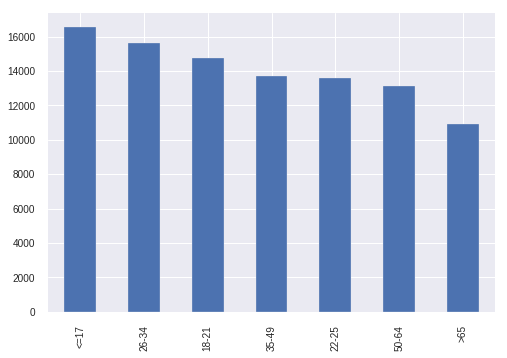

In [29]:
df['age_group']= pd.cut(df['age'].dropna(),[0,18,22,26,35,50,65,113],labels=['<=17','18-21','22-25','26-34','35-49','50-64','>65'],include_lowest=True)
#Distributing the continuous data into (
df['age_group'].value_counts().plot.bar()
#Maximum Users are from age Group 16-24.

In [19]:
(df[df['likes']==0]['likes'].count()/df['likes'].count())*100 #21% of the FaceBook Users have Zero Likes

21.89998065192819

In [18]:
df.count()


userid                   98201
age                      98201
dob_day                  98201
dob_year                 98201
dob_month                98201
gender                   98201
tenure                   98201
friend_count             98201
friendships_initiated    98201
likes                    98201
likes_received           98201
mobile_likes             98201
mobile_likes_received    98201
www_likes                98201
www_likes_received       98201
combined_likes           98201
age_group                98201
dtype: int64

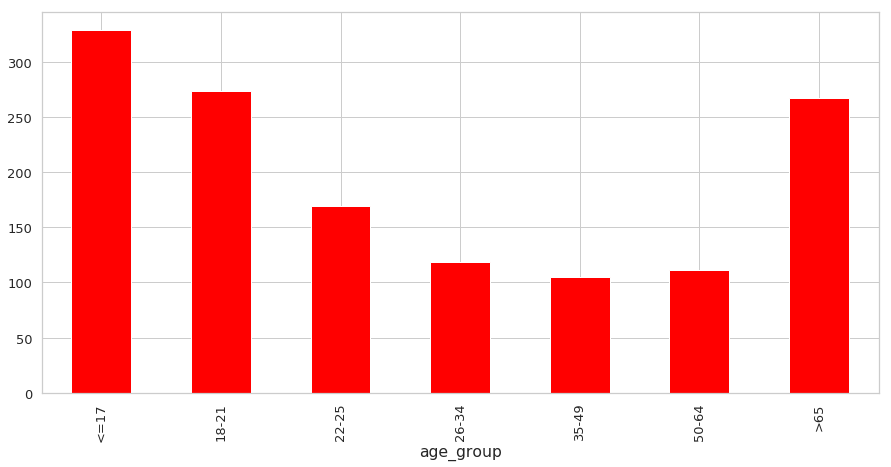

In [133]:
df.groupby(['age_group'])['friend_count'].mean().plot(kind='bar', figsize=(15, 7), color='red', fontsize=13)

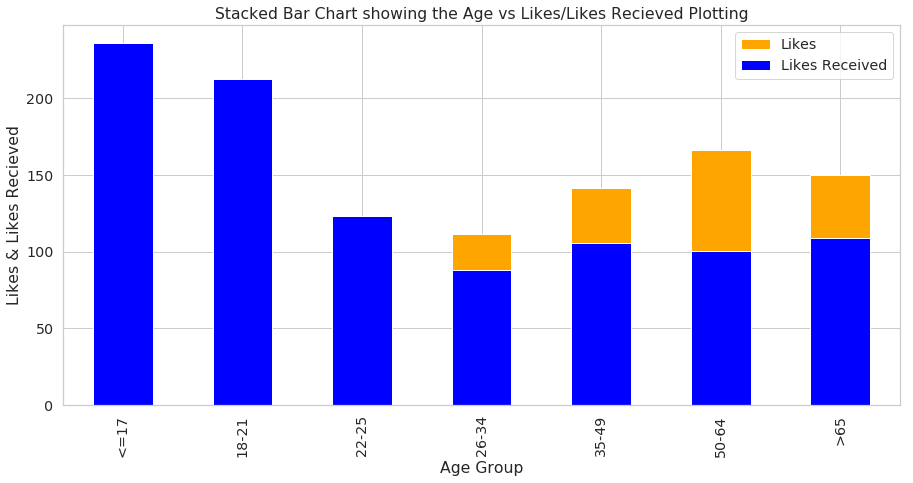

In [0]:

df.groupby(['age_group'])['likes'].mean().plot(kind='bar', figsize=(15, 7), color='orange')

df.groupby(['age_group'])['likes_received'].mean().plot(kind='bar', figsize=(15, 7), color='blue')
plt.xlabel('Age Group')
plt.ylabel('Likes & Likes Recieved')
plt.title('Stacked Bar Chart showing the Age vs Likes/Likes Recieved Plotting')
plt.legend(labels=('Likes','Likes Received'))

#Plotting Male Likes Vs Female Likes


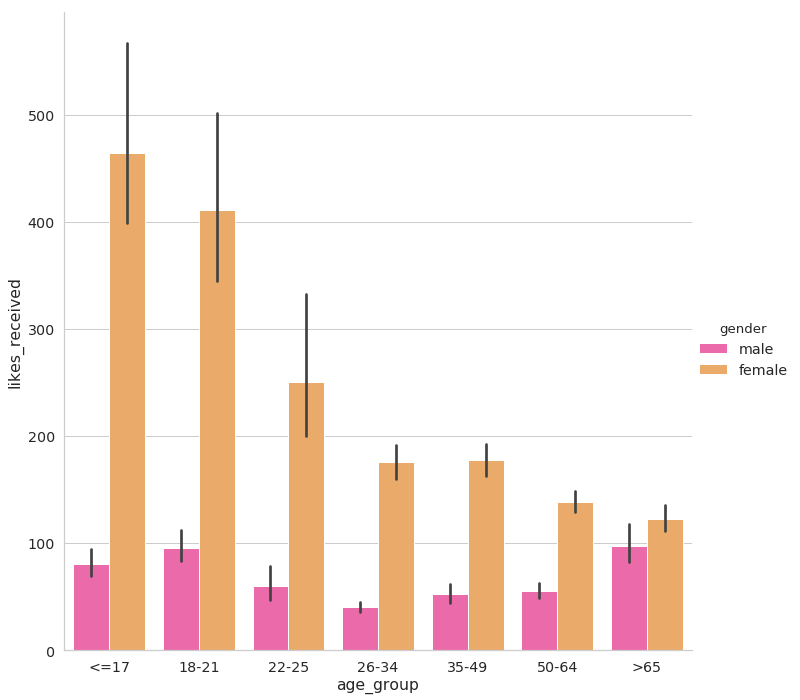

In [0]:
sns.catplot(x='age_group', y='likes_received', hue='gender', data=df,  height=10, kind='bar', 
            palette='spring')
# Females in all the age groups gets more like however in the agr from 13-16, 16-24, they have the most likes received.

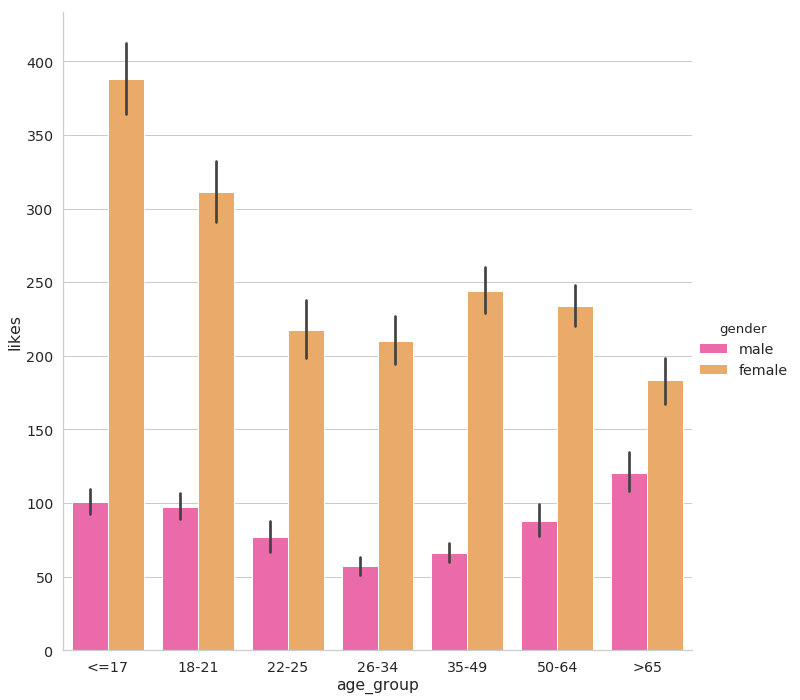

In [0]:
sns.catplot(x='age_group', y='likes', hue='gender', data=df,  height=10, kind='bar', 
            palette='spring')

# Below plot shows that females are expressive on facebook. Wehere as males are less expressive. One angle could be that females spend more time on facebook.

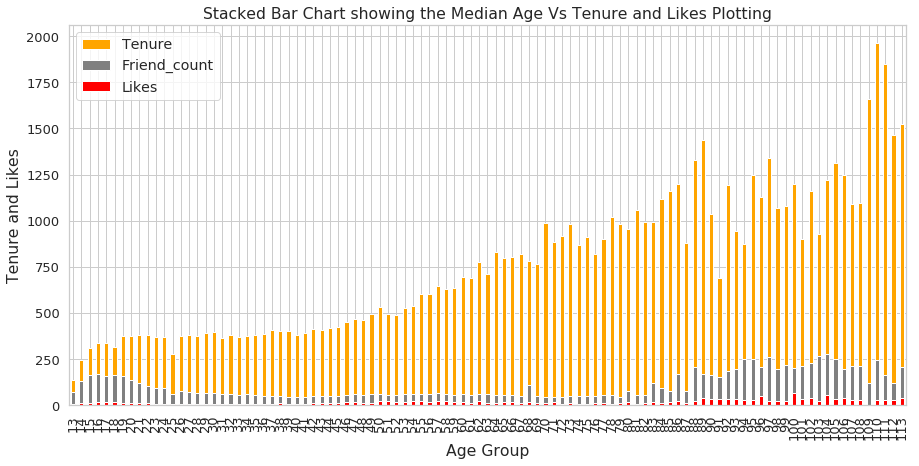

In [0]:

df.groupby(['age'])['tenure'].median().plot(kind='bar', figsize=(15, 7), color='orange')
df.groupby(['age'])['friend_count'].median().plot(kind='bar', figsize=(15, 7), color='grey')
df.groupby(['age'])['likes'].median().plot(kind='bar', figsize=(15, 7), color='red', fontsize=13)

plt.xlabel('Age Group')
plt.ylabel('Tenure and Likes')
plt.title('Stacked Bar Chart showing the Median Age Vs Tenure and Likes Plotting')
plt.legend(labels=('Tenure', 'Friend_count', 'Likes'))

#The Old age Group users have the maximum tenure as expected.

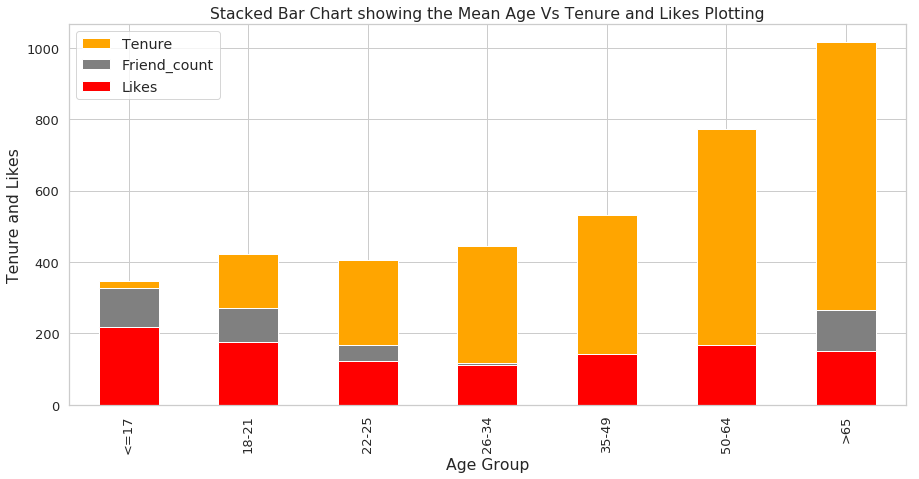

In [0]:
df.groupby(['age_group'])['tenure'].mean().plot(kind='bar', figsize=(15, 7), color='orange')
df.groupby(['age_group'])['friend_count'].mean().plot(kind='bar', figsize=(15, 7), color='grey')
df.groupby(['age_group'])['likes'].mean().plot(kind='bar', figsize=(15, 7), color='red', fontsize=13)

plt.xlabel('Age Group')
plt.ylabel('Tenure and Likes')
plt.title('Stacked Bar Chart showing the Mean Age Vs Tenure and Likes Plotting')
plt.legend(labels=('Tenure', 'Friend_count', 'Likes'))
# There is huge difference between mean and median of the likes. However it cannot be considered as an outlier as the number of likes are high for older age groups. Also the Older Age Group users are significant in numbers.

In [20]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

     |████████████████████████████████| 133kB 4.6MB/s 
     |████████████████████████████████| 614kB 44.8MB/s 
     |████████████████████████████████| 225kB 50.5MB/s 
     |████████████████████████████████| 768kB 37.0MB/s 
     |████████████████████████████████| 194kB 44.2MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 737kB 29.4MB/s 
     |████████████████████████████████| 51kB 10.0MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=049bbb03b4cf0c900d3be6a00bb7c0d71601ba65d616bb7dfb91d3858d212c4d
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=30a2069a1b33c466f6278919d5a081035ff033e9dd8589ed12eb2348e0a8fa68
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created whe

In [0]:
import pandas_profiling 

In [49]:
df.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

In [0]:
df.reset_index(inplace=True) # userid is 100% unique. So making the user id as an index.
df.head(5)
																 

In [0]:
#from pandas.plotting import parallel_coordinates #importing parallal coordinates
df[df['age']>108]['age'].value_counts()

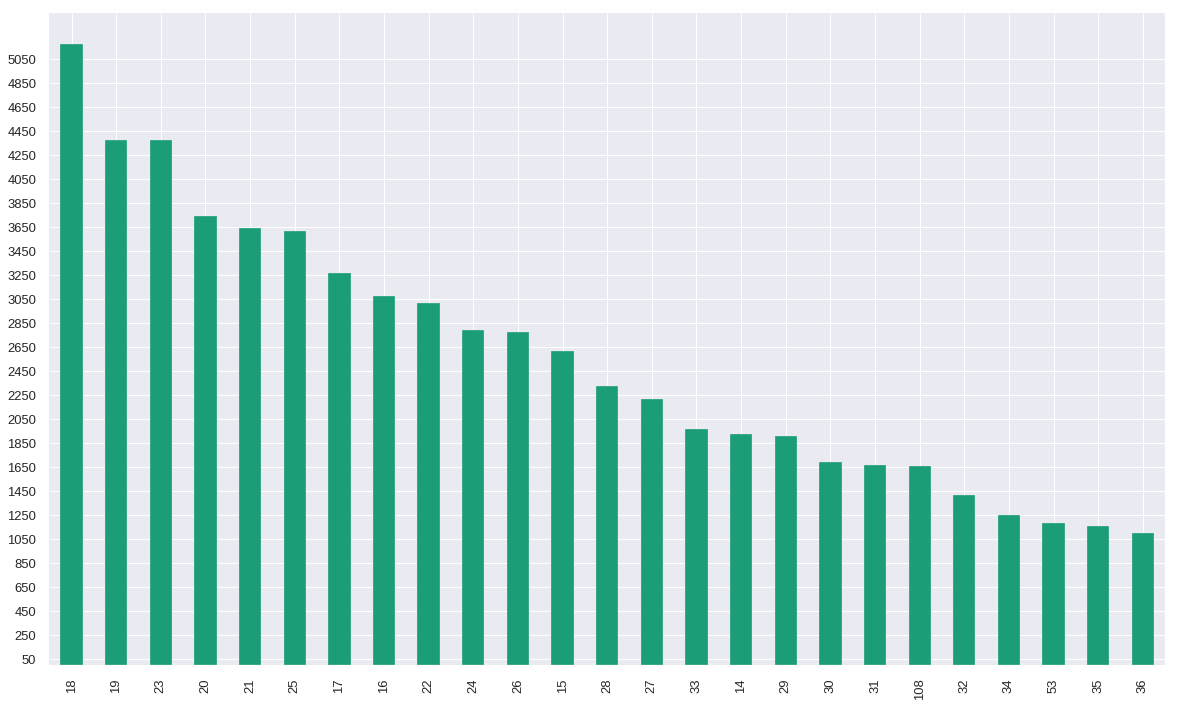

In [22]:
#df['dob_year'].value_counts().sort_values(ascending=True)
df['age'].value_counts()[:25].plot.bar(figsize=(20,12), colormap='Dark2', fontsize=13, yticks=np.arange(50, 5250,200)) #Finding the facebook users of maximum age group
#Top 25 age group of the FB users lies Between the age group of 14 to 35.

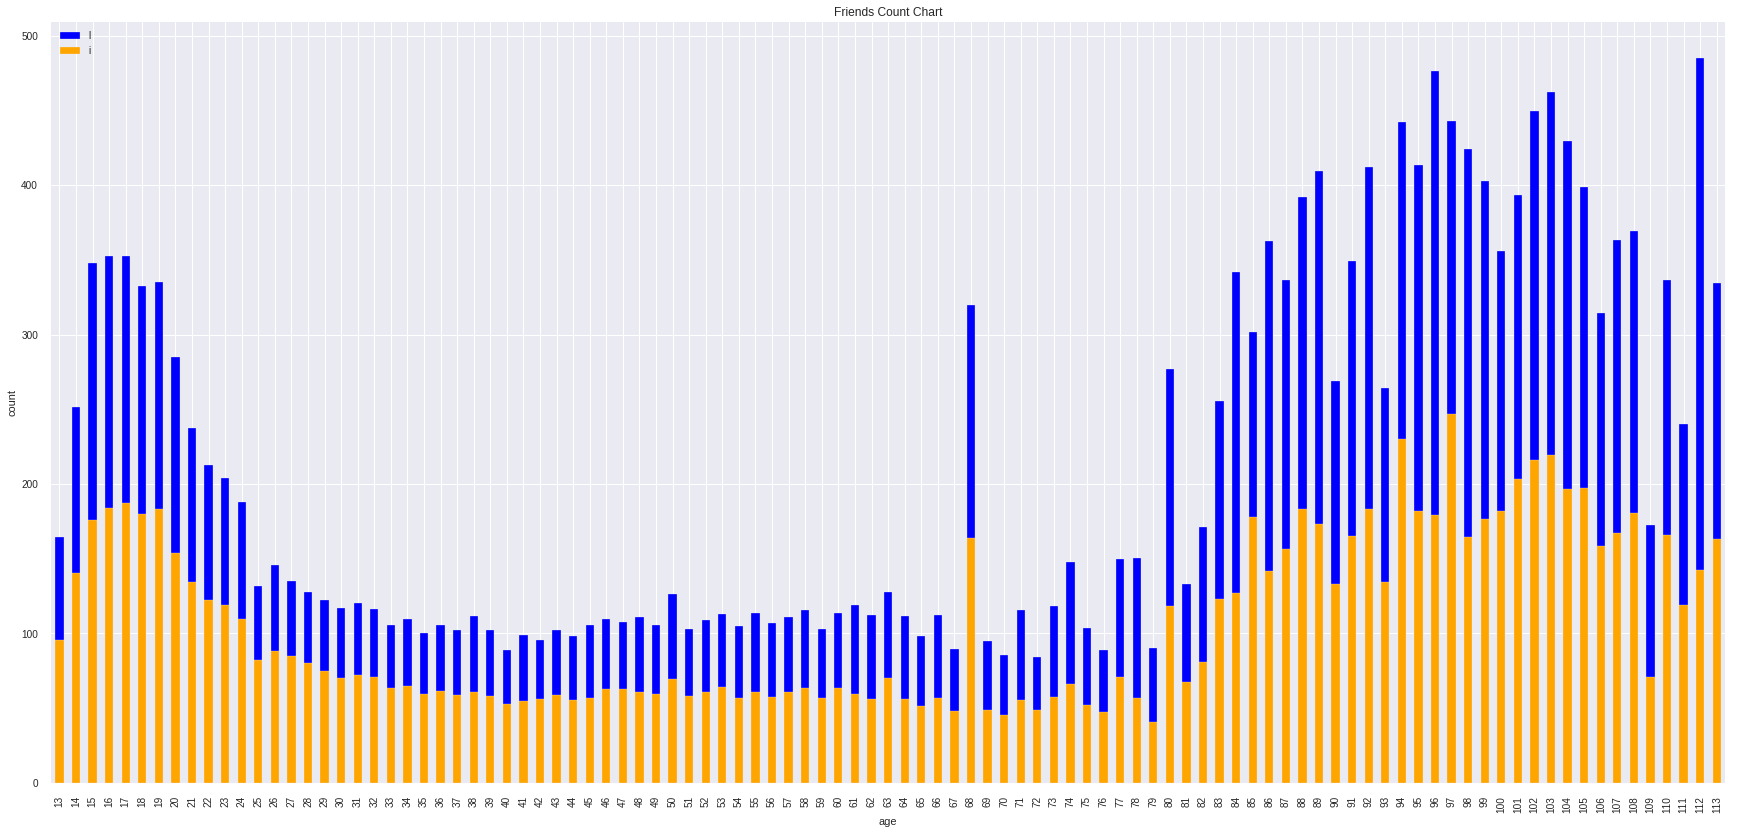

In [24]:

df1=df #Frinedship initiated and requet recieved are equally distributed

df1.groupby(['age'])['friend_count'].mean().plot(kind='bar', figsize=(30, 14), color='blue')
df1.groupby(['age'])['friendships_initiated'].mean().plot(kind='bar', figsize=(30, 14), color='orange')


plt.xlabel('age')
plt.ylabel('count')
plt.title('Friends Count Chart')
plt.legend(labels=('likes'))


In [31]:
df.head(5)

userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382  14   19       1999      11         male    266.0   0              
1  1192601  14   2        1999      11         female  6.0     0              
2  2083884  14   16       1999      11         male    13.0    0              
3  1203168  14   25       1999      12         female  93.0    0              
4  1733186  14   4        1999      12         male    82.0    0              

   friendships_initiated  likes  likes_received  mobile_likes  \
0  0                      0      0               0              
1  0                      0      0               0              
2  0                      0      0               0              
3  0                      0      0               0              
4  0                      0      0               0              

   mobile_likes_received  www_likes  www_likes_received  combined_likes  \
0  0                      0          0                   0                
1  0                      0          0                   0                
2  0                      0          0                   0                
3  0                      0          0                   0                
4  0                      0          0                   0                

  age_group  
0  <=17      
1  <=17      
2  <=17      
3  <=17      
4  <=17

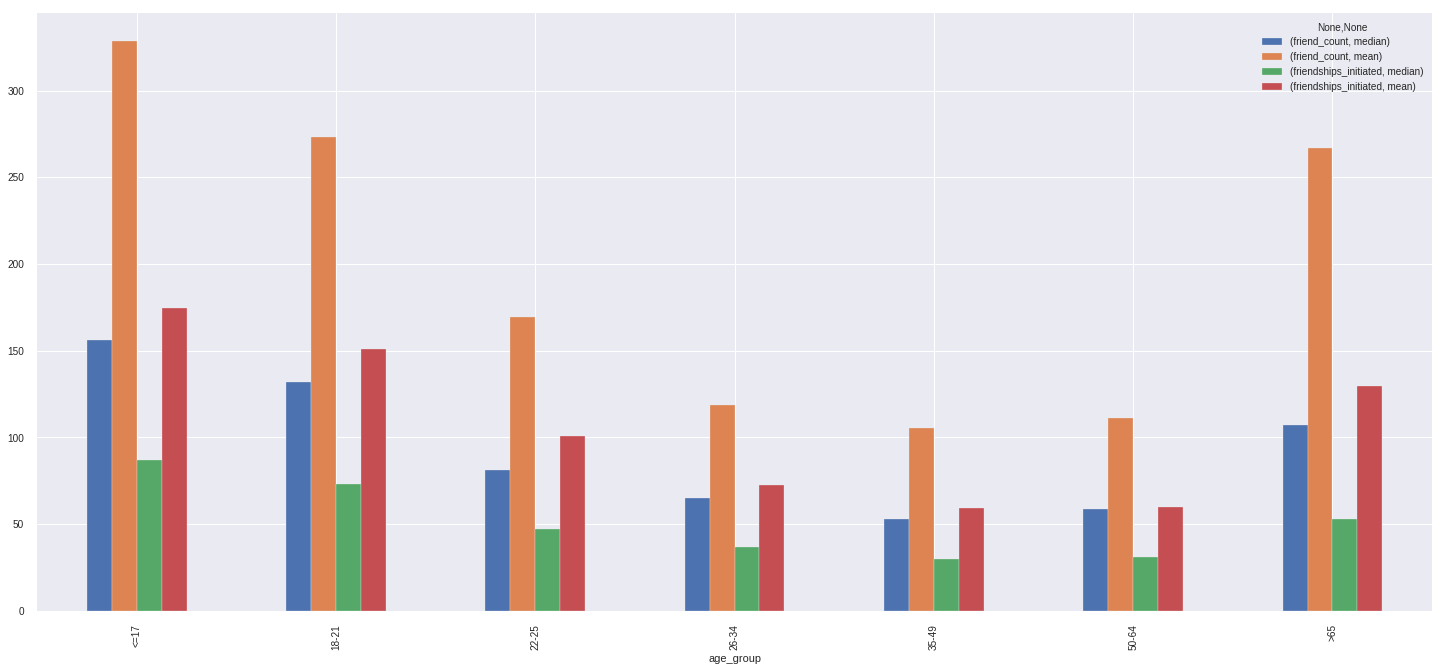

In [49]:
df.groupby(['age_group'])[['friend_count','friendships_initiated']].agg(['median','mean']).plot(kind='bar', figsize=(25, 11))
#more than 200 pwecent of difference between mean and median for freind_count and friendships_initiates shows high skewness in the data.

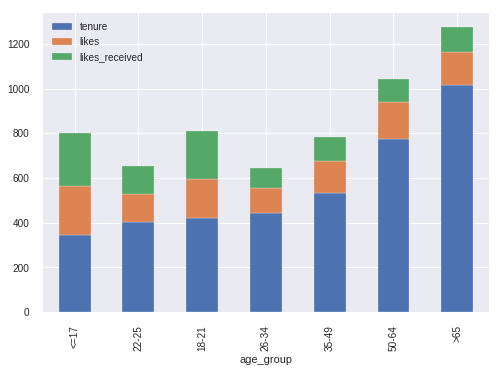

In [65]:
df_stats_legendary = df.groupby(['age_group']).mean()[['tenure', 'likes',]].sort_values(by='tenure', ascending='False')    
df_stats_legendary.plot.bar(stacked=True)
	#More the tenure, more the likes.

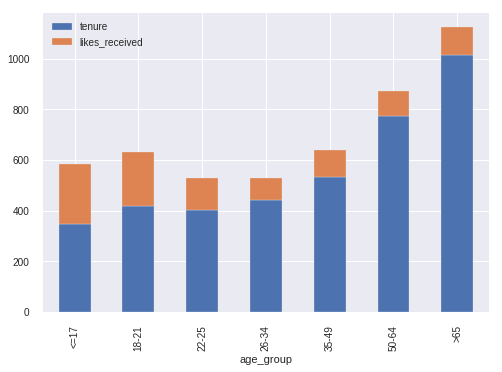

In [69]:
df_stats_legendary = df.groupby(['age_group']).mean()[['tenure', 'likes_received']]  
df_stats_legendary.plot.bar(stacked=True)

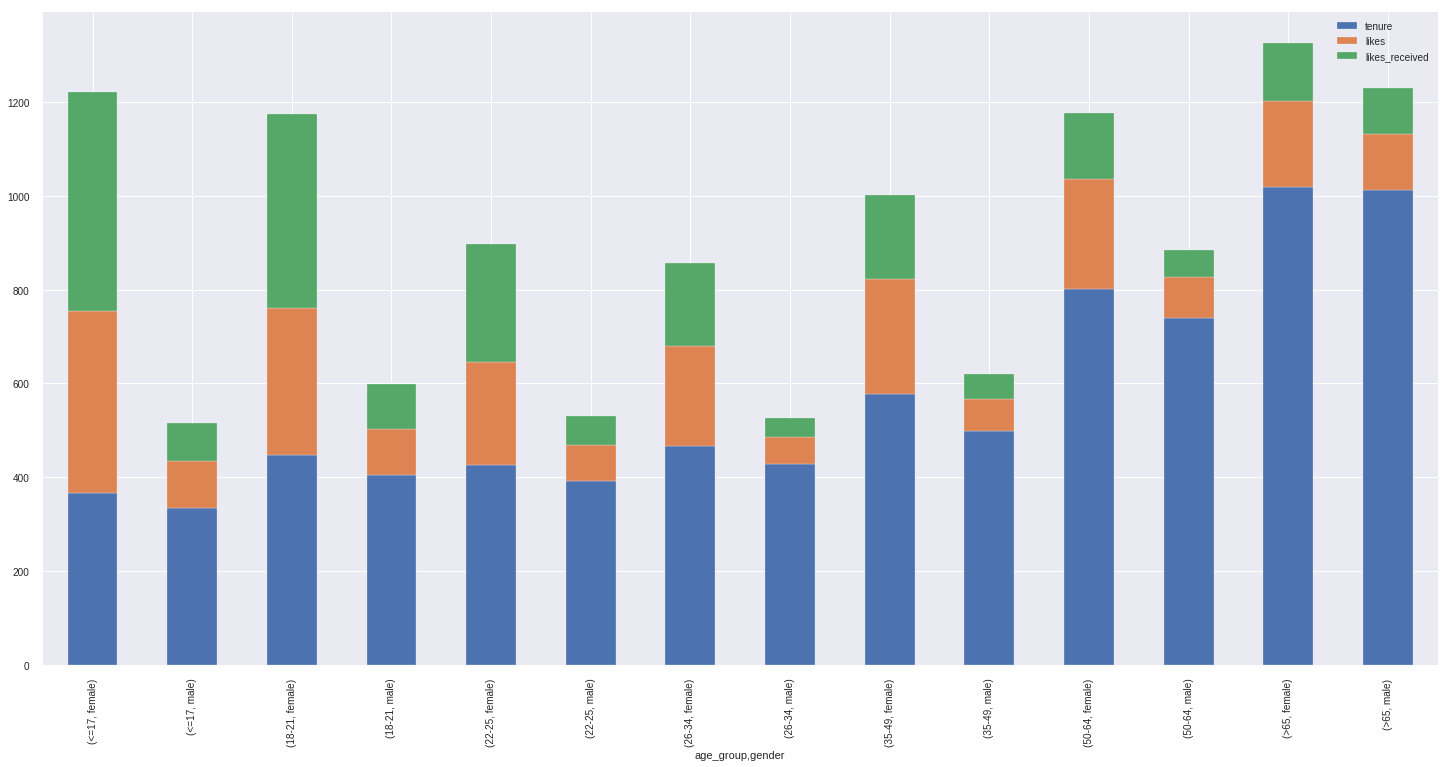

In [74]:
df.groupby(['age_group','gender']).mean()[['tenure','likes','likes_received']].plot(kind='bar', figsize= (25,12) ,stacked=True)

#Similar tenure is observed for male and females  across age groups. For each age group the likes recieved and the likes are more for females compared to the males.
#The ratio between male & female likes/likes received is almost 180 % in the younger age groups however it gradually decreases to 105%.


In [0]:
from pandas.plotting import parallel_coordinates #importing parallal coordinates
plt.figure(figsize=(16,9))
parallel_coordinates(df, 
                     class_column='tenure', colormap='viridis',  
                     cols=['likes', 'likes_received'])